In [2]:
# Part 1 - Question A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set()
import math

In [3]:
# Part 1 - Question B
data_raw = pd.read_csv('data.csv')

C:\Users\tanis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data_raw.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [5]:
data_raw['Season']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
682149    2019
682150    2019
682151    2019
682152    2019
682153    2019
Name: Season, Length: 682154, dtype: int64

In [6]:
#Part 2 - Question A
play_id_20181115001638 = data_raw[(data_raw['PlayId'] == 20181115001638)]
play_id_20181115001638

"""
Stadium Type, Turf, Temperature, Humidity, etc. all have the same values for all the 22 rows and each describe a certain element
of the play. 

Orientation, X, Y, S, A, etc. all tell stats about the player specifically.
"""

'\nStadium Type, Turf, Temperature, Humidity, etc. all have the same values for all the 22 rows and each describe a certain element\nof the play. \n\nOrientation, X, Y, S, A, etc. all tell stats about the player specifically.\n'

In [7]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12*2, 6.33*2)):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

def plot_play(play_id, train_df=data_raw):
    def get_dx_dy(angle, dist):
        cartesianAngleRadians = (450-angle)*math.pi/180.0
        dx = dist * math.cos(cartesianAngleRadians)
        dy = dist * math.sin(cartesianAngleRadians)
        return dx, dy

    fig, ax = create_football_field()
    train_df.query("PlayId == @play_id and Team == 'away'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=50, legend='Away')
    train_df.query("PlayId == @play_id and Team == 'home'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=50, legend='Home')
    train_df.query("PlayId == @play_id and NflIdRusher == NflId") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='red', s=100, legend='Rusher')
    rusher_row = train_df.query("PlayId == @play_id and NflIdRusher == NflId")
    yards_covered = rusher_row["Yards"].values[0]

    x = rusher_row["X"].values[0]
    y = rusher_row["Y"].values[0]
    rusher_dir = rusher_row["Dir"].values[0]
    rusher_orientation = rusher_row["Orientation"].values[0]
    rusher_speed = rusher_row["S"].values[0]
    dx, dy = get_dx_dy(rusher_dir, rusher_speed)
    dx_o, dy_o = get_dx_dy(rusher_orientation, rusher_speed/2)

    ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.3)
    ax.arrow(x, y, dx_o, dy_o, length_includes_head=True, width=0.3, color="yellow")
    plt.title(f'Play # {play_id} and yard gain is {yards_covered}', fontsize=20)
    plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

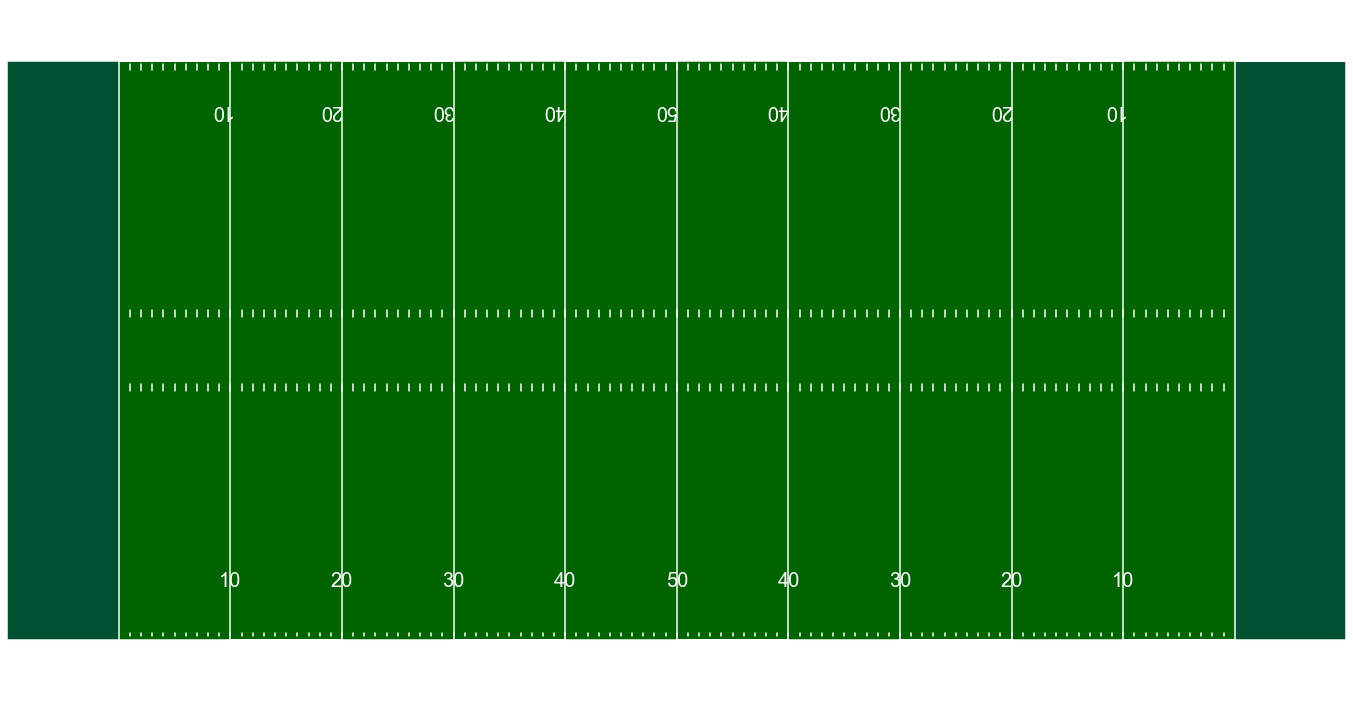

In [8]:
# how to use these two functions (one calls the other)
plot_play(play_id=20181115001638, train_df=data_raw)

"""
Question 2 Part B

Appears that the offense is going left down the field at an angle. The rusher appears to be looking in a similar direction
to where they run. Based on my knowledge of the game of football, it appears the offense is in orange and the defense 
is in blue. The offense seems to be clustered around the rusher, wheile the defense appears to be more spead out in order
to cover all the different directions the rusher could go.
"""

In [ ]:
#player = data_raw[(data_raw['PlayId'] == 20181115001638) & (data_raw['Yards'] == 3)]
player = data_raw[(data_raw['PlayId'] == 20181115001638)]
player['Season'] #2018 (first 4 chars of player id) appears to correlate with year of season

In [ ]:
plays_2017 = data_raw[(data_raw['Season'] == 2017)]
plays_2017 = pd.unique(plays_2017['PlayId']).tolist()
plays_2017

In [ ]:
plays_2018 = data_raw[(data_raw['Season'] == 2018)]
plays_2018 = pd.unique(plays_2018['PlayId']).tolist()
plays_2018

In [ ]:
# Question 2 - Part C
for i in range(3):
    plot_play(play_id=plays_2017[i], train_df=data_raw)
    plot_play(play_id=plays_2018[i], train_df=data_raw)

"""
From what I can observe, it seems like the direction that the rusher is looking in is completely different from the direction 
that they are actually rushing. This does not seem to make much sense b/c most people are going to look where they are
running.
"""

In [ ]:
x = data_raw[(data_raw['PlayId'] == 20180906000214) & (data_raw['Yards'] == 5)]
x['Y']

In [ ]:
# Question 2 - Part D
y_coords = data_raw['Y']
plt.plot(y_coords)
plt.show()

"""
Y-coords seems to range from 10 - 47/48 from most plays. Few outliers above and beyond as shown in the graph below.
This makes a lot of sense to be because the yard markers on the football field range from 10 - 50. I am confused why
any values would be above 50. It makes sense that some values may be under 10 because there are yard measures from 0-10, 
but I noticed that after 50, it goes back to 40, 30, 20 and so on.
"""

In [ ]:
# Question 2- Part E
yards = data_raw['Yards']

plt.plot(yards)
plt.show()

plt.boxplot(yards)
plt.show()

yards.describe()

#print(yards.median()) # AKA 50% percentile

"""
The mean is 4.227626 yards/play and the median is 3 yards/play. The max yard gain is 99.000000. The min yard gain is -15. 
"""

In [ ]:
# Question 2 - Part F
stadiums = data_raw['StadiumType']
types_stadiums = pd.unique(data_raw['StadiumType']).tolist() 
types_stadiums

In [ ]:
print(data_raw['StadiumType'].value_counts())

"""
Most common field type if outdoor, followed by outdoors (haha they are both the same thing).
"""

In [ ]:
# Question 2 - Part G
plt.plot(data_raw['Humidity'], data_raw['Yards'])
plt.xlabel("Humidity")
plt.ylabel("Yards")
plt.show()

In [ ]:
for i in range(len(types_stadiums)):
    rows = data_raw[(data_raw['StadiumType'] == types_stadiums[i])]
    #print(types_stadiums[i])
    plt.title("Yards Vs. {}" .format(types_stadiums[i]))
    plt.plot(rows['Yards'])
    plt.show()
    
"""
As we can see from both sets of graphs, there is no correlation between humidity and yards gained or type of stadium and yards
gained. We know this because all the graphs have values of all ranges, and there is no trend that we can see.
"""

In [15]:
# Part 3 
def clean_data(data):
    data = data.copy() # DataFrames are objects, we don't to mess with what we passed in
    
    # a)
    data = data.drop(columns=["Stadium", "Location", "StadiumType", "Turf", "GameWeather", "Temperature", "Humidity", "WindDirection", "WindSpeed", "FieldPosition", "Week"])
    data = data.dropna()
    # b)
#     nfl = pd.read_csv('nfl_teams.csv')
#     nfl = nfl['Abbreviation'].tolist()
    
#     wrong_possesion = []
#     wrong_home = []
#     wrong_visiting = []
    
#     for i in range(len(data)):
#         abbrev_possesion_team = data.iloc[i]['PossessionTeam']
#         abbrev_home_team = data.iloc[i]['HomeTeamAbbr']
#         abbrev_visiting_team = data.iloc[i]['VisitorTeamAbbr']
      
#         if (abbrev_possesion_team not in nfl):
#             wrong_possesion.append(i)
#         elif (abbrev_home_team not in nfl):
#             wrong_home.append(i)
#         elif (abbrev_visiting_team not in nfl):
#             wrong_visiting.append(i)

#     print(wrong_possesion)
#     print(wrong_home)
#     print(wrong_visiting)

    # c)
    for i in range(len(data)):
        nfl_id = data.iloc[i]['NflId']
        rusher = data.iloc[i]['NflIdRusher']
        if (nfl_id == rusher):
            data['isRusher'] = 1
    
    #d)
    
    #e)
    
    #f)
    
    #g)
    
    #h)
    
    #i)
    
    #j)
    
    #k)

In [16]:
clean_data(data_raw)

MemoryError: Unable to allocate 114. MiB for an array with shape (22, 682034) and data type float64

In [ ]:
data_raw = clean_data(data_raw)
data_raw